<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de nepltcio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de nepltcio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de nepltcio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [99]:
!pip install plotly

In [100]:
##Se importan todas las librerías
import pandas as pd
import numpy as np
import seaborn as sb
from datetime import datetime
import math as mt
import plotly.graph_objects as go
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import panel as pn
import plotly.graph_objects as go
import pandas as pd
pn.extension('plotly')
from ipywidgets import interactive
pn.extension('plotly')

In [101]:
## 2.1 Se cargan los archivos de los años 2019, 2020 y 2021 con el fin de validar su estructura y contenido
# Se cargan en orden cronológico ascendente 

data_12019 = pd.read_csv("./SB11_20191.csv", encoding = "UTF-8", delimiter = ";")
print(data_12019.info())
data_22019 = pd.read_csv("./SB11_20192.csv", encoding = "UTF-8", delimiter = ";")
#print(data_22019.info())
data_12020 = pd.read_csv("./SB11_20201.csv", encoding = "UTF-8", delimiter = ";")
#print(data_12020.info())
data_22020 = pd.read_csv("./SB11_20202.csv", encoding = "UTF-8", delimiter = ";")
#print(data_22020.info())
data_12021 = pd.read_csv("./SB11_20211.csv", encoding = "UTF-8", delimiter = ";")
#print(data_12021.info())
columnas = (data_12019.columns.values.tolist())
print(columnas)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             2 non-null      object 
 1   ESTU_NACIONALIDAD              2 non-null      object 
 2   ESTU_GENERO                    2 non-null      object 
 3   ESTU_FECHANACIMIENTO           2 non-null      object 
 4   PERIODO                        2 non-null      int64  
 5   ESTU_CONSECUTIVO               2 non-null      object 
 6   ESTU_ESTUDIANTE                2 non-null      object 
 7   ESTU_PAIS_RESIDE               2 non-null      object 
 8   ESTU_TIENEETNIA                2 non-null      object 
 9   ESTU_DEPTO_RESIDE              2 non-null      object 
 10  ESTU_COD_RESIDE_DEPTO          2 non-null      int64  
 11  ESTU_MCPIO_RESIDE              2 non-null      object 
 12  ESTU_COD_RESIDE_MCPIO          2 non-null      int64  

 
 # Revisión Inicial de los Datos

 De acuerdo con la lista de las columnas reportadas en los archivos correspondientes a los años 2019, 2020 y 2021 correspondientes a 5 periodos se tienen variables del tipo numérico, categórico que corresponden a la información de 4 áreas de interes para cada estudiante. Buscando dejar en en analisis las variables correspondientes a las caracteristicas de los estudiantes, se eliminan las variables: 

 * 'ESTU_TIPODOCUMENTO','ESTU_NACIONALIDAD', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE','ESTU_DEPTO_RESIDE','ESTU_MCPIO_RESIDE','FAMI_TRABAJOLABORMADRE', 'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL','FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEpltS','FAMI_NUMLIBROS','COLE_CODIplt_ICFES','COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_NOMBRE_ESTABLECIMIENTO','COLE_CARACTER','COLE_COD_DANE_SEDE','COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL', 'COLE_AREA_UBICACION','COLE_COD_MCPIO_UBICACION','COLE_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION','ESTU_COD_MCPIO_PRESENTACION','ESTU_MCPIO_PRESENTACION','ESTU_DEPTO_PRESENTACION',  'ESTU_COD_DEPTO_PRESENTACION','PERCENTIL_LECTURA_CRITICA','PERCENTIL_MATEMATICAS','PERCENTIL_C_NATURALES', 'PERCENTIL_SOCIALES_CIUDADANAS','PERCENTIL_INGLES','PERCENTIL_GLOBAL','ESTU_INSE_INDIVIDUAL','ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO','ESTU_ESTADOINVESTIGACION','ESTU_GENERACION-E','PERCENTIL_ESPECIAL_GLOBAL'

In [102]:
## 1.1 Se eliminan las columnas para todos los archivos procesados se crean nuevos dataframe por 
periodo1 = data_12019.iloc[:,[2,3,4,8,10,12,13,14,15,16,17,19,20,21,22,29,30,31,32,33,34,35,36,40,41,42,43,48,49,54,59,61,62,64,65,67,68,70,71,73,74,82]]
periodo2 = data_22019.iloc[:,[2,3,4,8,10,12,13,14,15,16,17,19,20,21,22,29,30,31,32,33,34,35,36,40,41,42,43,48,49,54,59,61,62,64,65,67,68,70,71,73,74,82]]
periodo3 = data_12020.iloc[:,[2,3,4,8,10,12,13,14,15,16,17,19,20,21,22,29,30,31,32,33,34,35,36,40,41,42,43,48,49,54,59,61,62,64,65,67,68,70,71,73,74,82]]
periodo4 = data_22020.iloc[:,[2,3,4,8,10,12,13,14,15,16,17,19,20,21,22,29,30,31,32,33,34,35,36,40,41,42,43,48,49,54,59,61,62,64,65,67,68,70,71,73,74,82]]
periodo5 = data_12021.iloc[:,[2,3,4,8,10,12,13,14,15,16,17,19,20,21,22,29,30,31,32,33,34,35,36,40,41,42,43,48,49,54,59,61,62,64,65,67,68,70,71,73,74]]

#print((concatenar_datos().columns.values.tolist()))


In [103]:
## 1.2 Se unen los archivos leidos con las columnas seleccionadas

def concatenar_datos():
    union_periodos = pd.concat([periodo1,periodo2], axis = 0, join = 'inner')
    union_3_periodos = pd.concat([union_periodos,periodo3], axis = 0, join = 'inner') 
    union_4_periodos = pd.concat([union_3_periodos,periodo4], axis = 0, join = 'inner') 
    Base_completa =  pd.concat([union_4_periodos,periodo5], axis = 0, join = 'inner') 
    return Base_completa
print(concatenar_datos().info)

<bound method DataFrame.info of       ESTU_GENERO ESTU_FECHANACIMIENTO  PERIODO ESTU_TIENEETNIA  \
0               M            5/02/2000    20191              No   
1               F           28/11/2000    20191              No   
0               F           24/10/2000    20194              Si   
1               F           16/05/2002    20194              No   
2               F           27/07/2000    20194              No   
...           ...                  ...      ...             ...   
15523           F            2/01/2003    20211              No   
15524           F            3/04/2004    20211              No   
15525           M            6/06/2004    20211              No   
15526           F           14/01/2004    20211              No   
15527           M           22/08/2003    20211              No   

       ESTU_COD_RESIDE_DEPTO  ESTU_COD_RESIDE_MCPIO FAMI_ESTRATOVIVIENDA  \
0                       52.0                52001.0            Estrato 3   
1          

In [104]:
## 1.3 Se crea una nueva base de datos para validar las estadisticas de las variables númericas 

DatosIcfes = concatenar_datos()
dfnumerico = DatosIcfes.select_dtypes(include='number')
dfnumerico.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)

## 1.4 Se identifican las variables que continene valores faltantes para validar la necesidad de los datos y de este modo decidir las variables

nan_values = DatosIcfes.isna()
nan_columns = nan_values.any()
columns_with_nan = DatosIcfes.columns[nan_columns].tolist()
print("La cantidad de datos faltantes en cada una de las columnas es: " , DatosIcfes.isnull().sum())
print ("Las columnas que se encuentran con NA en el Conjunto de datos de análisis son: ", str(columns_with_nan))

## 1.5 Resultado del analisis se eliminan los registros con NA en cualquiera de las columnas y nos quedamos con los demas datos

def eliminar_faltantes():
    DataIcfesFinal = DatosIcfes.dropna()
    return DataIcfesFinal
eliminar_faltantes()

La cantidad de datos faltantes en cada una de las columnas es:  ESTU_GENERO                         5
ESTU_FECHANACIMIENTO                0
PERIODO                             0
ESTU_TIENEETNIA                  1691
ESTU_COD_RESIDE_DEPTO               8
ESTU_COD_RESIDE_MCPIO               8
FAMI_ESTRATOVIVIENDA              760
FAMI_PERSONASHOGAR                542
FAMI_CUARTOSHOGAR                 558
FAMI_EDUCACIONPADRE               688
FAMI_EDUCACIONMADRE               700
FAMI_TRABAJOLABORMADRE            560
FAMI_TIENEINTERNET                684
FAMI_TIENESERVICIOTV              698
FAMI_TIENECOMPUTADOR              531
FAMI_COMELECHEDERIVADOS           791
FAMI_COMECARNEPESCADOHUEVO        704
FAMI_COMECEREALFRUTOSLEGUMBRE     721
FAMI_SITUACIONECONOMICA           577
ESTU_DEDICACIONLECTURADIARIA      703
ESTU_DEDICACIONINTERNET           720
ESTU_HORASSEMANATRABAJA           553
ESTU_TIPOREMUNERACION             592
COLE_GENERO                         0
COLE_NATURALEZA         

ESTU_GENERO ESTU_FECHANACIMIENTO  PERIODO ESTU_TIENEETNIA  \
0               M            5/02/2000    20191              No   
0               F           24/10/2000    20194              Si   
1               F           16/05/2002    20194              No   
2               F           27/07/2000    20194              No   
3               M           18/03/2003    20194              No   
...           ...                  ...      ...             ...   
15522           M           29/11/2004    20211              No   
15524           F            3/04/2004    20211              No   
15525           M            6/06/2004    20211              No   
15526           F           14/01/2004    20211              No   
15527           M           22/08/2003    20211              No   

       ESTU_COD_RESIDE_DEPTO  ESTU_COD_RESIDE_MCPIO FAMI_ESTRATOVIVIENDA  \
0                       52.0                52001.0            Estrato 3   
0                       94.0                94343.0            Estrato 3   
1                       11.0                11001.0            Estrato 2   
2                       47.0                47001.0            Estrato 1   
3                        5.0                 5001.0            Estrato 2   
...                      ...                    ...                  ...   
15522                   19.0                19001.0            Estrato 5   
15524                   76.0                76001.0            Estrato 4   
15525                   76.0                76001.0            Estrato 3   
15526                   76.0                76001.0            Estrato 2   
15527                   19.0                19001.0            Estrato 4   

      FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR               FAMI_EDUCACIONPADRE  \
0                  3 a 4              Tres  Técnica o tecnológica incompleta   
0                  3 a 4            Cuatro                 Primaria completa   
1                  5 a 6              Tres               Primaria incompleta   
2                  5 a 6               Dos               Primaria incompleta   
3                  3 a 4               Dos    Técnica o tecnológica completa   
...                  ...               ...                               ...   
15522              3 a 4              Tres                         No Aplica   
15524              3 a 4              Tres    Educación profesional completa   
15525              5 a 6              Tres                         Postgrado   
15526              3 a 4            Cuatro    Educación profesional completa   
15527              3 a 4               Dos                         Postgrado   

       ... DESEMP_LECTURA_CRITICA PUNT_MATEMATICAS DESEMP_MATEMATICAS  \
0      ...                      3               72                  4   
0      ...                      2               30                  1   
1      ...                      2               45                  2   
2      ...                      2               46                  2   
3      ...                      3               70                  3   
...    ...                    ...              ...                ...   
15522  ...                      4               66                  3   
15524  ...                      2               51                  3   
15525  ...                      3               59                  3   
15526  ...                      3               61                  3   
15527  ...                      4               71                  4   

      PUNT_C_NATURALES DESEMP_C_NATURALES PUNT_SOCIALES_CIUDADANAS  \
0                   67                  3                       60   
0                   36                  1                       30   
1                   38                  1                       30   
2                   39                  1                       40   
3                   61                  3                       49   
...                ...        

### 1.6 Identificación y transfromación de variables categóricas
 
Las variables que se factorizan para el análisis de la misión 2 son las siguientes con los correspondientes valores: 

* ESTU_GENERO_CAT - F = 1, M = 0
* ESTRATO_CAT - Sin Estrato = 0 Estrato 1 = 1 ..... Estrato 6 = 6
* FAMI_PERSONASHOGAR_CAT - 1 a 2 = 1, 3 a 4 = 2, 5 a 6 = 3, 7 a 8 = 4, 9 o Más = 5
* NOCUARTOS_CAT -  Uno = 1 .... Seis o más = 0
* FAMI_TIENEINTERNET_CAT -  Si = 1, No = 0
* FAMI_TIENESERVICIOTV_CAT - Si = 1, No = 0
* FAMI_TIENECOMPUTADOR_CAT - Si = 1, No = 0
* FAMI_SITUACIONECONOMICA_CAT - Igual = 1, Mejor = 2 , Peor = 3
* COLE_GENERO_CAT - Mixto = 1, Femenino = 2, Masculino = 3
* COLE_NATURALEZA_CAT No Oficial = 1 Oficial = 2
* COLE_BILINGUE_CAT - S = 1 N = 0
* COLE_CALENDARIO_CAT - A = 1 B = 2 Otra = 3
* COLE_JORNADA_CAT - COMPLETA = 1, MAÑANA = 2 , TARDE = 3, NOCHE = 4, UNICA = 5, SABATINA = 6
* COLE_AREA_UBICACION_CAT - Urbano = 1, Rural = 2
* ESTU_TIENEETNIA_CAT - Si = 1, No = 0
* FAMI_COMELECHEDERIVADOS_CAT - 3 a 5 veces por semana = 1, 3 a 5 veces por semana = 2, Todos o casi todos los días = 3, Nunca o rara vez comemos eso = 4
    

In [105]:
## 1.6 Se analizan las variables categoricas y convertirlas en factor

def transformar_cat():
    nuevo_df = eliminar_faltantes()
    nuevo_df.head()
    conditions = [
    (nuevo_df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 1'),
    (nuevo_df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 2'),
    (nuevo_df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 3'),
    (nuevo_df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 4'),
    (nuevo_df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 5'),
    (nuevo_df['FAMI_ESTRATOVIVIENDA'] == 'Estrato 6'),
    (nuevo_df['FAMI_ESTRATOVIVIENDA'] == 'Sin Estrato')
    ]
    values = [1, 2, 3, 4,5,6,0]
    nuevo_df['ESTRATO_CAT'] = np.select(conditions, values)
    nuevo_df['ESTU_TIENEETNIA_CAT'] = nuevo_df['ESTU_TIENEETNIA'].mask(nuevo_df.ESTU_TIENEETNIA == 'Si', int(1)).mask(nuevo_df.ESTU_TIENEETNIA == 'No', int(0))
    nuevo_df['ESTU_GENERO_CAT'] = nuevo_df['ESTU_GENERO'].mask(nuevo_df.ESTU_GENERO == 'F', int(1)).mask(nuevo_df.ESTU_GENERO == 'M', int(2))
    nuevo_df['FAMI_COMELECHEDERIVADOS_CAT'] = nuevo_df['FAMI_COMELECHEDERIVADOS'].mask(nuevo_df.FAMI_COMELECHEDERIVADOS == '3 a 5 veces por semana', int(2)).mask(nuevo_df.FAMI_COMELECHEDERIVADOS == '1 o 2 veces por semana', int(1)).mask(nuevo_df.FAMI_COMELECHEDERIVADOS == 'Nunca o rara vez comemos eso', int(4)).mask(nuevo_df.FAMI_COMELECHEDERIVADOS == 'Todos o casi todos los días', int(3))
    nuevo_df['FAMI_PERSONASHOGAR_CAT'] = nuevo_df['FAMI_PERSONASHOGAR'].mask(nuevo_df.FAMI_PERSONASHOGAR == '1 a 2', int(1)).mask(nuevo_df.FAMI_PERSONASHOGAR == '3 a 4', int(2)).mask(nuevo_df.FAMI_PERSONASHOGAR == '5 a 6', int(3)).mask(nuevo_df.FAMI_PERSONASHOGAR == '7 a 8', int(4)).mask(nuevo_df.FAMI_PERSONASHOGAR == '9 o más', int(5))
    nuevo_df['NOCUARTOS_CAT'] = nuevo_df['FAMI_ESTRATOVIVIENDA'].mask(nuevo_df.FAMI_CUARTOSHOGAR == 'Uno', int(1)).mask(nuevo_df.FAMI_CUARTOSHOGAR == 'Dos', int(2)).mask(nuevo_df.FAMI_CUARTOSHOGAR == 'Tres', int(3)).mask(nuevo_df.FAMI_CUARTOSHOGAR == 'Cuatro', int(4)).mask(nuevo_df.FAMI_CUARTOSHOGAR == 'Cinco', int(5)).mask(nuevo_df.FAMI_CUARTOSHOGAR == 'Seis o mas',int(6))
    nuevo_df['FAMI_TIENEINTERNET_CAT'] = nuevo_df['FAMI_TIENEINTERNET'].mask(nuevo_df.FAMI_TIENEINTERNET == 'Si', int(1)).mask(nuevo_df.FAMI_TIENEINTERNET == 'No', int(2))
    nuevo_df['FAMI_TIENESERVICIOTV_CAT'] = nuevo_df['FAMI_TIENESERVICIOTV'].mask(nuevo_df.FAMI_TIENESERVICIOTV == 'Si', int(1)).mask(nuevo_df.FAMI_TIENESERVICIOTV == 'No', int(2))
    nuevo_df['FAMI_TIENECOMPUTADOR_CAT'] = nuevo_df['FAMI_TIENECOMPUTADOR'].mask(nuevo_df.FAMI_TIENECOMPUTADOR == 'Si', int(1)).mask(nuevo_df.FAMI_TIENECOMPUTADOR == 'No', int(2))
    nuevo_df['FAMI_SITUACIONECONOMICA_CAT'] = nuevo_df['FAMI_SITUACIONECONOMICA'].mask(nuevo_df.FAMI_SITUACIONECONOMICA == 'Igual', int(1)).mask(nuevo_df.FAMI_SITUACIONECONOMICA == 'Mejor', int(2)).mask(nuevo_df.FAMI_SITUACIONECONOMICA == 'Peor', int(3))
    nuevo_df['COLE_GENERO_CAT'] = nuevo_df['COLE_GENERO'].mask(nuevo_df.COLE_GENERO == 'MIXTO', int(1)).mask(nuevo_df.COLE_GENERO == 'FEMENINO', int(2)).mask(nuevo_df.COLE_GENERO == 'MASCULINO', int(3))
    nuevo_df['COLE_NATURALEZA_CAT'] = nuevo_df['COLE_NATURALEZA'].mask(nuevo_df.COLE_NATURALEZA == 'NO OFICIAL', int(1)).mask(nuevo_df.COLE_NATURALEZA == 'OFICIAL', int(2))
    nuevo_df['COLE_CALENDARIO_CAT'] = nuevo_df['COLE_CALENDARIO'].mask(nuevo_df.COLE_CALENDARIO == 'A', int(1)).mask(nuevo_df.COLE_CALENDARIO == 'B', int(2)).mask(nuevo_df.COLE_GENERO == 'OTRO', int(3))
    nuevo_df['COLE_BILINGUE_CAT'] = nuevo_df['COLE_BILINGUE'].mask(nuevo_df.COLE_BILINGUE == 'N', int(0)).mask(nuevo_df.COLE_BILINGUE == 'S', int(1))
    nuevo_df['COLE_JORNADA_CAT'] = nuevo_df['COLE_JORNADA'].mask(nuevo_df.COLE_JORNADA == 'COMPLETA', int(1)).mask(nuevo_df.COLE_JORNADA == 'MAÑANA', int(2)).mask(nuevo_df.COLE_JORNADA == 'TARDE', int(3)).mask(nuevo_df.COLE_JORNADA == 'NOCHE', int(4)).mask(nuevo_df.COLE_JORNADA == 'UNICA', int(5)).mask(nuevo_df.COLE_JORNADA == 'SABATINA', int(6))
    nuevo_df['COLE_AREA_UBICACION_CAT'] = nuevo_df['COLE_AREA_UBICACION'].mask(nuevo_df.COLE_AREA_UBICACION == 'URBANO', int(1)).mask(nuevo_df.COLE_AREA_UBICACION == 'RURAL', int(0))
    Data_icfes_categoria = nuevo_df.drop(['FAMI_COMELECHEDERIVADOS','ESTU_GENERO','ESTU_TIENEETNIA','PUNT_INGLES','DESEMP_INGLES', 'FAMI_ESTRATOVIVIENDA','FAMI_PERSONASHOGAR','FAMI_CUARTOSHOGAR','FAMI_TIENEINTERNET','FAMI_TIENESERVICIOTV','FAMI_TIENECOMPUTADOR','FAMI_SITUACIONECONOMICA','COLE_GENERO','COLE_NATURALEZA','COLE_CALENDARIO','COLE_BILINGUE','COLE_JORNADA','COLE_AREA_UBICACION'],  axis=1)
    return Data_icfes_categoria
transformar_cat()


<ipython-input-105-c5e288dc59a9>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-c5e288dc59a9>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-c5e288dc59a9>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-

ESTU_FECHANACIMIENTO  PERIODO  ESTU_COD_RESIDE_DEPTO  \
0                5/02/2000    20191                   52.0   
0               24/10/2000    20194                   94.0   
1               16/05/2002    20194                   11.0   
2               27/07/2000    20194                   47.0   
3               18/03/2003    20194                    5.0   
...                    ...      ...                    ...   
15522           29/11/2004    20211                   19.0   
15524            3/04/2004    20211                   76.0   
15525            6/06/2004    20211                   76.0   
15526           14/01/2004    20211                   76.0   
15527           22/08/2003    20211                   19.0   

       ESTU_COD_RESIDE_MCPIO               FAMI_EDUCACIONPADRE  \
0                    52001.0  Técnica o tecnológica incompleta   
0                    94343.0                 Primaria completa   
1                    11001.0               Primaria incompleta   
2                    47001.0               Primaria incompleta   
3                     5001.0    Técnica o tecnológica completa   
...                      ...                               ...   
15522                19001.0                         No Aplica   
15524                76001.0    Educación profesional completa   
15525                76001.0                         Postgrado   
15526                76001.0    Educación profesional completa   
15527                19001.0                         Postgrado   

                        FAMI_EDUCACIONMADRE  \
0      Secundaria (Bachillerato) incompleta   
0                       Primaria incompleta   
1                       Primaria incompleta   
2        Secundaria (Bachillerato) completa   
3            Educación profesional completa   
...                                     ...   
15522                             Postgrado   
15524      Técnica o tecnológica incompleta   
15525        Educación profesional completa   
15526    Secundaria (Bachillerato) completa   
15527                             Postgrado   

                                  FAMI_TRABAJOLABORMADRE  \
0      Es dueño de un negocio grande, tiene un cargo ...   
0              Trabaja en el hogar, no trabaja o estudia   
1              Trabaja en el hogar, no trabaja o estudia   
2      Trabaja como personal de limpieza, mantenimien...   
3      Tiene un trabajo de tipo auxiliar administrati...   
...                                                  ...   
15522  Es dueño de un negocio grande, tiene un cargo ...   
15524       Es vendedor o trabaja en atención al público   
15525  Tiene un trabajo de tipo auxiliar administrati...   
15526          Trabaja en el hogar, no trabaja o estudia   
15527                                         Pensionado   

         FAMI_COMECARNEPESCADOHUEVO FAMI_COMECEREALFRUTOSLEGUMBRE  \
0      Nunca o rara vez comemos eso        1 o 2 veces por semana   
0            1 o 2 veces por semana        3 a 5 veces por semana   
1       Todos o casi todos los días        1 o 2 veces por semana   
2            1 o 2 veces por semana  Nunca o rara vez comemos eso   
3       Todos o casi todos los días        1 o 2 veces por semana   
...                             ...                           ...   
15522   Todos o casi todos los días        3 a 5 veces por semana   
15524        3 a 5 veces por semana        1 o 2 veces por semana   
15525   Todos o casi todos los días   Todos o casi todos los días   
15526        3 a 5 veces por semana   Todos o casi todos los días   
15527   Todos o casi todos los días        3 a 5 veces por semana   

      ESTU_DEDICACIONLECTURADIARIA  ... FAMI_TIENEINTERNET_CAT  \
0               30 minutos o menos  ...                      1   
0                Entre 1 y 2 horas  ...                      2   
1               30 minutos o menos  ...                      1   
2       No leo por entretenimiento  ...                      2   
3       No leo por entr

In [106]:
## Convertir a variables categoricas las variables que fueron factorizadas en el ejercicio anterior.

DatosFinales = pd.DataFrame(transformar_cat())
DatosFinales['ESTRATO_CAT'] = DatosFinales['ESTRATO_CAT'].astype('category')
DatosFinales['FAMI_PERSONASHOGAR_CAT'] = DatosFinales['FAMI_PERSONASHOGAR_CAT'].astype('category')
DatosFinales['NOCUARTOS_CAT'] = DatosFinales['NOCUARTOS_CAT'].astype('category')
DatosFinales['FAMI_TIENEINTERNET_CAT'] = DatosFinales['FAMI_TIENEINTERNET_CAT'].astype('category')
DatosFinales['FAMI_TIENESERVICIOTV_CAT'] = DatosFinales['FAMI_TIENESERVICIOTV_CAT'].astype('category')
DatosFinales['FAMI_TIENECOMPUTADOR_CAT'] = DatosFinales['FAMI_TIENECOMPUTADOR_CAT'].astype('category')
DatosFinales['FAMI_SITUACIONECONOMICA_CAT'] = DatosFinales['FAMI_SITUACIONECONOMICA_CAT'].astype('category')
DatosFinales['COLE_GENERO_CAT'] = DatosFinales['COLE_GENERO_CAT'].astype('category')
DatosFinales['COLE_NATURALEZA_CAT'] = DatosFinales['COLE_NATURALEZA_CAT'].astype('category')
DatosFinales['COLE_CALENDARIO_CAT'] = DatosFinales['COLE_CALENDARIO_CAT'].astype('category')
DatosFinales['COLE_BILINGUE_CAT'] = DatosFinales['COLE_BILINGUE_CAT'].astype('category')
DatosFinales['COLE_JORNADA_CAT'] = DatosFinales['COLE_JORNADA_CAT'].astype('category')
DatosFinales['FAMI_COMECARNEPESCADOHUEVO'] = DatosFinales['FAMI_COMECARNEPESCADOHUEVO'].astype('category')
DatosFinales['FAMI_COMECEREALFRUTOSLEGUMBRE'] = DatosFinales['FAMI_COMECEREALFRUTOSLEGUMBRE'].astype('category')
DatosFinales['ESTU_DEDICACIONINTERNET'] = DatosFinales['ESTU_DEDICACIONINTERNET'].astype('category')
DatosFinales['ESTU_HORASSEMANATRABAJA'] = DatosFinales['ESTU_HORASSEMANATRABAJA'].astype('category')
DatosFinales['ESTU_PRIVADO_LIBERTAD'] = DatosFinales['ESTU_PRIVADO_LIBERTAD'].astype('category')
DatosFinales['COLE_AREA_UBICACION_CAT'] = DatosFinales['COLE_AREA_UBICACION_CAT'].astype('category')
DatosFinales['ESTU_DEDICACIONLECTURADIARIA'] = DatosFinales['ESTU_DEDICACIONLECTURADIARIA'].astype('category')
DatosFinales['ESTU_TIPOREMUNERACION'] = DatosFinales['ESTU_TIPOREMUNERACION'].astype('category')
DatosFinales['PERIODO'] = DatosFinales['PERIODO'].astype('object')
DatosFinales['ESTU_COD_RESIDE_DEPTO'] = DatosFinales['ESTU_COD_RESIDE_DEPTO'].astype('object')
DatosFinales['ESTU_COD_RESIDE_MCPIO'] = DatosFinales['ESTU_COD_RESIDE_MCPIO'].astype('object')
DatosFinales['ESTU_GENERO_CAT'] = DatosFinales['ESTU_GENERO_CAT'].astype('category')
DatosFinales['ESTU_TIENEETNIA_CAT'] = DatosFinales['ESTU_TIENEETNIA_CAT'].astype('category')
DatosFinales['FAMI_COMELECHEDERIVADOS_CAT'] = DatosFinales['FAMI_COMELECHEDERIVADOS_CAT'].astype('category')

##Del análisis de correlación que se tiene de las variables numéricas que se seleccionaron para estudio se determina mantener las variables de desempeño en cada una de las asignaturas y de esta forma eliminar las variables de los puntajes de cada una de las asignaturas.
## Eliminar los puntajes por asignaturas
DatosFinales = DatosFinales.drop(['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS', 'PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS'], axis=1)


<ipython-input-105-c5e288dc59a9>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-c5e288dc59a9>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-c5e288dc59a9>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-

In [107]:
print(" A continuación se muestran las caracteristicas de las variables numéricas analizadas, con las estadisticas descriptivas de las variables de los puntajes de las diferentes areas y el puntaje global")
DatosFinales.describe(include=['number'])

 A continuación se muestran las caracteristicas de las variables numéricas analizadas, con las estadisticas descriptivas de las variables de los puntajes de las diferentes areas y el puntaje global


DESEMP_LECTURA_CRITICA  DESEMP_MATEMATICAS  DESEMP_C_NATURALES  \
count            10914.000000        10914.000000        10914.000000   
mean                 3.341213            3.136155            2.798699   
std                  0.684510            0.688005            0.743138   
min                  1.000000            1.000000            1.000000   
25%                  3.000000            3.000000            2.000000   
50%                  3.000000            3.000000            3.000000   
75%                  4.000000            4.000000            3.000000   
max                  4.000000            4.000000            4.000000   

       DESEMP_SOCIALES_CIUDADANAS   PUNT_GLOBAL  
count                10914.000000  10914.000000  
mean                     2.818673    313.094374  
std                      0.831555     52.374259  
min                      1.000000    135.000000  
25%                      2.000000    279.000000  
50%                      3.000000    319.000000  
75%                      3.000000    351.000000  
max                      4.000000    495.000000

In [108]:
print(" A continuación se muestran las caracteristicas de las variables categóricas analizadas, las cuales incluyen las variables con valores factorizados de acuerdo al item 1.6") 
DatosFinales.describe(include=['category'])

 A continuación se muestran las caracteristicas de las variables categóricas analizadas, las cuales incluyen las variables con valores factorizados de acuerdo al item 1.6


FAMI_COMECARNEPESCADOHUEVO FAMI_COMECEREALFRUTOSLEGUMBRE  \
count                         10914                         10914   
unique                            4                             4   
top     Todos o casi todos los días        3 a 5 veces por semana   
freq                           7927                          3998   

       ESTU_DEDICACIONLECTURADIARIA ESTU_DEDICACIONINTERNET  \
count                         10914                   10914   
unique                            5                       5   
top              30 minutos o menos          Más de 3 horas   
freq                           3629                    4550   

       ESTU_HORASSEMANATRABAJA ESTU_TIPOREMUNERACION ESTU_PRIVADO_LIBERTAD  \
count                    10914                 10914                 10914   
unique                       6                     4                     1   
top                          0                    No                     N   
freq                      8830                  9268                 10914   

        ESTRATO_CAT  ESTU_TIENEETNIA_CAT  ESTU_GENERO_CAT  ...  \
count         10914                10914            10914  ...   
unique            7                    2                2  ...   
top               4                    0                1  ...   
freq           2538                10801             5583  ...   

        FAMI_TIENEINTERNET_CAT  FAMI_TIENESERVICIOTV_CAT  \
count                    10914                     10914   
unique                       2                         2   
top                          1                         1   
freq                     10772                     10321   

        FAMI_TIENECOMPUTADOR_CAT  FAMI_SITUACIONECONOMICA_CAT  \
count                      10914                        10914   
unique                         2                            3   
top                            1                            1   
freq                       10512                         6714   

        COLE_GENERO_CAT  COLE_NATURALEZA_CAT  COLE_CALENDARIO_CAT  \
count             10914                10914                10914   
unique                3                    2                    3   
top                   1                    1                    2   
freq               9371                10842                10624   

        COLE_BILINGUE_CAT  COLE_JORNADA_CAT  COLE_AREA_UBICACION_CAT  
count               10914             10914                    10914  
unique                  2                 6                        2  
top                     0                 1                        1  
freq                 7371              7458                     9209  

[4 rows x 23 columns]

In [109]:
print(" A continuación se muestran las caracteristicas de las variables de tipo objeto analizadas, estas variables corresponden a las variables con muchas categorias o variables de codigos de identificación de departamentos, municipios, periodos")
DatosFinales.describe(include=[object])

 A continuación se muestran las caracteristicas de las variables de tipo objeto analizadas, estas variables corresponden a las variables con muchas categorias o variables de codigos de identificación de departamentos, municipios, periodos


ESTU_FECHANACIMIENTO  PERIODO  ESTU_COD_RESIDE_DEPTO  \
count                 10914    10914                10914.0   
unique                 2252        5                   28.0   
top               3/04/2003    20211                   76.0   
freq                     24    10834                 5453.0   

        ESTU_COD_RESIDE_MCPIO             FAMI_EDUCACIONPADRE  \
count                 10914.0                           10914   
unique                  138.0                              12   
top                   76001.0  Educación profesional completa   
freq                   4313.0                            3931   

                   FAMI_EDUCACIONMADRE  \
count                            10914   
unique                              12   
top     Educación profesional completa   
freq                              4610   

                                   FAMI_TRABAJOLABORMADRE  
count                                               10914  
unique                                                 13  
top     Trabaja como profesional (por ejemplo médico, ...  
freq                                                 3680

 
 # Análisis de los datos iniciales

 Para el análisis de los datos se toman 5 periodos académicos, correspondientes a tres años, la base de datos inicial esta construida con 5 periodos de datos cada uno con 83 variables y 21.083 en cada uno de los archivos, al consolidar los periodos de evaluación correspondiente a los años 2019, 2020 y 2021-1 obtenemos una base de datos de 1.103.130 registros y 82 variables.

 De acuerdo con la información contenida en cada uno de los archivos tenemos información correspondiente a: 

 * Información de codificación del estudiante y periodo de evaluación 
 * Información económica del estudiante 
 * Condiciones de formación académica de los padres 
 * Condiciones relacionadas con la institución académica
 * Condiciones demográficas del estudiante y del colegio 
 * Resultados obtenidos por el estudiante en el examen

 Para obtener las variables de análisis se discriminan por el tipo de información contenida y su efecto sobre la variable de estudio que corresponde al puntaje obtenido en el examen por el estudiante, obteniendo así el conjunto de datos para estudio, con 41 variables para las que se eliminan todos los registros donde existen datos faltantes en cualquiera de las varibles, correspondiente resultando 818.064 registros lo que corresponde a un porcentaje de faltantes globales de 25.84%

Con el 74.16% de los datos iniciamos el análisis del comportamiento de las variables y las relaciones entre ellas con 39 variables numéricas y categóricas que se factorizan para poder evaluar el comportamiento de las mismas.



# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

# Análisis de la Variable Puntaje Global 

# Análisis de la variable de respuesta

In [110]:
##Se inicia con la evaluación de la distribución de la variable de estudio, para ello se genera un grafico de distribución 

fig = px.histogram(DatosFinales, 
                   x='PUNT_GLOBAL', 
                   marginal='box', 
                   nbins=100, 
                   title='Distribución del Puntaje Global de la Prueba Saber 11'
                   )    
fig.update_layout(bargap=0.1)
fig.show()

print('Del histograma de la variable que muestra la información del Puntaje Global de los estudiantes encontramos que tiene una Distribución Normal con sesgo hacia la izquierda es decir que la cola de los puntajes menores al promedio es más pesada') 



fig = px.box(DatosFinales, x = "ESTRATO_CAT" ,y="PUNT_GLOBAL", color="ESTU_GENERO_CAT",title = "Distribución de Puntaje por Estrato")
fig.update_yaxes(ticklabelposition="outside", title='Puntaje Global')
fig.update_xaxes(ticklabelposition="outside", title='Estrato')
fig.show()

print('Del gráfico anterior vemos que existe una relación entre el estrato socioeconomico del estudiante y su desempeño en la prueba, sin embargo, el genero del estudiante no esta afectando la media del resultado de la prueba') 


Del histograma de la variable que muestra la información del Puntaje Global de los estudiantes encontramos que tiene una Distribución Normal con sesgo hacia la izquierda es decir que la cola de los puntajes menores al promedio es más pesada


Del gráfico anterior vemos que existe una relación entre el estrato socioeconomico del estudiante y su desempeño en la prueba, sin embargo, el genero del estudiante no esta afectando la media del resultado de la prueba


De la anterior gráfica se tiene una alta correlación entre los desempeños y el puntaje global, por ende nos quedamos unicamente con el desempeño en el área de matematicas con el fin de nostrarle al usuario final un modelo que permite categorizar a los estudientes que por su desempeño en el área de matemáticas serían estudiantes candidatos a estudiar un posgrado en el área de Ingeniería


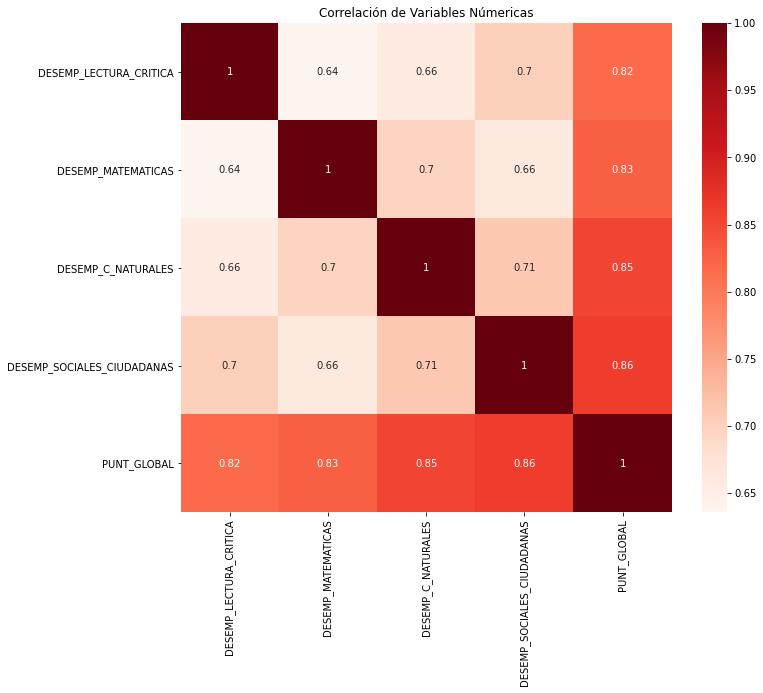

In [111]:
# Se realiza un gráfico para validar la relación entre las variables de los puntajes por asignatura y el puntaje global
##Se genera la matrix de correlación
corr = DatosFinales.corr()
f, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(corr, cmap='Reds', annot=True)
plt.title('Correlación de Variables Númericas')
print("De la anterior gráfica se tiene una alta correlación entre los desempeños y el puntaje global, por ende nos quedamos unicamente con el desempeño en el área de matematicas con el fin de nostrarle al usuario final un modelo que permite categorizar a los estudientes que por su desempeño en el área de matemáticas serían estudiantes candidatos a estudiar un posgrado en el área de Ingeniería")

In [112]:
## Se eliminan las variables de desempeño en cada una de las áreas

DatosModelo = DatosFinales.drop(['DESEMP_LECTURA_CRITICA','DESEMP_C_NATURALES', 'DESEMP_SOCIALES_CIUDADANAS'], axis=1)
DatosModelo.info()

fig = go.Figure()
fig.add_trace(go.Box(x=DatosModelo['FAMI_EDUCACIONPADRE'],y=DatosModelo['PUNT_GLOBAL'],name='Educación Padre',
                marker_color = 'indianred'))
fig.add_trace(go.Box(x=DatosModelo['FAMI_EDUCACIONMADRE'], y=DatosModelo['PUNT_GLOBAL'],name='Educación Madre',
                marker_color = 'lightseagreen'))
fig.show()

#fig = px.box(DatosFinales, x = "FAMI_EDUCACIONPADRE" ,y="PUNT_GLOBAL", color="ESTU_GENERO",title = "Distribución de Puntaje por Estrato")
#fig.update_yaxes(ticklabelposition="outside", title='Puntaje Global')
#fig.update_xaxes(ticklabelposition="outside", title='Estrato')

 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10914 entries, 0 to 15527
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   ESTU_FECHANACIMIENTO           10914 non-null  object  
 1   PERIODO                        10914 non-null  object  
 2   ESTU_COD_RESIDE_DEPTO          10914 non-null  object  
 3   ESTU_COD_RESIDE_MCPIO          10914 non-null  object  
 4   FAMI_EDUCACIONPADRE            10914 non-null  object  
 5   FAMI_EDUCACIONMADRE            10914 non-null  object  
 6   FAMI_TRABAJOLABORMADRE         10914 non-null  object  
 7   FAMI_COMECARNEPESCADOHUEVO     10914 non-null  category
 8   FAMI_COMECEREALFRUTOSLEGUMBRE  10914 non-null  category
 9   ESTU_DEDICACIONLECTURADIARIA   10914 non-null  category
 10  ESTU_DEDICACIONINTERNET        10914 non-null  category
 11  ESTU_HORASSEMANATRABAJA        10914 non-null  category
 12  ESTU_TIPOREMUNERACION          1

In [113]:
## Validar los estratos de acuerdo con la Dedicación a la Lectura diaría para validar correlación de variables
fig = px.histogram(DatosFinales, 
                   x='PUNT_GLOBAL',
                   color='COLE_AREA_UBICACION_CAT',
                   marginal='box', 
                   nbins=100, 
                   title='Distribución del Puntaje Global de la Prueba Saber 11')
fig.update_layout(bargap=0.1)
fig.update_xaxes(ticklabelposition="outside", title='Puntaje Global')
fig.update_yaxes(ticklabelposition="outside", title='Frecuencia')
fig.show()


fig = px.histogram(DatosFinales, 
                   x='PUNT_GLOBAL',
                   color='ESTU_HORASSEMANATRABAJA',
                   marginal='box', 
                   nbins=100, 
                   title='Distribución del Puntaje Global de la Prueba Saber 11')
fig.update_layout(bargap=0.1)
fig.update_xaxes(ticklabelposition="outside", title='Puntaje Global')
fig.update_yaxes(ticklabelposition="outside", title='Frecuencia')
fig.show()

Crear la variable de respuesta de la preguynta de negocio planteada, que corresponde a identificar si de acuerdo con el puntaje Glogal el estudiante tiene una alta probabilidad de entrar a la Universidad, para ello y dado que en el análisis anterior se observó que la variable Puntaje tiene un distribución normal vamos a calificar la variable como positiva si el puntaje global supera los 320 puntos, para la población analizada.

In [114]:
## Creación de la variable de estudio

conditions = [
    (DatosFinales['PUNT_GLOBAL'] >= 280),
    (DatosFinales['PUNT_GLOBAL'] < 280)]
values = [1,0]
DatosFinales['POSGRADO'] = np.select(conditions, values)

In [115]:
## Graficar e desempeño en matemáticas

fig = px.histogram(DatosFinales, 
                   x='PUNT_GLOBAL',
                   color='ESTU_TIENEETNIA_CAT',
                   marginal='box', 
                   nbins=100, 
                   title='Distribución del Desempeño en matemáticas de la Prueba Saber 11')
fig.update_layout(bargap=0.1)
fig.update_xaxes(ticklabelposition="outside", title='Puntaje Global')
fig.update_yaxes(ticklabelposition="outside", title='Frecuencia')
fig.show()

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

## Planteamiento del Modelo de Regresión Validar el efecto de las variables sociodemográficas para explicar el Puntaje de la Prueba

De acuerdo con los análisis gráficos realizados en la misión dos, encontramos que existen algunas variables categóricas que impactan sobre el puntaje global, de la prueba que se maneja como variable única de estudio dado que esta esta explicada a través de la sumatoria de los puntajes de cada una de la áreas. 

De esta manera se busca responder a dos preguntas de negocio a través las variables seleccionadas en la misión anterior. Con estas variables se genera un modelo de regresión lineal que busca explicar el valor obtenido en la prueba. 

De otro lado se busca predecir a través de las variables que tengan un efecto mayor sobre la variable de estudio si un estudiante queda clasificado como un candidato para hacer un programa de educación superior y cuales no.

In [116]:
## Modelo de Regresión Lineal
data_final = DatosFinales.loc[:,['PUNT_GLOBAL','ESTU_GENERO_CAT','ESTU_TIENEETNIA_CAT','FAMI_TIENEINTERNET_CAT','FAMI_SITUACIONECONOMICA_CAT', 'FAMI_PERSONASHOGAR_CAT','FAMI_TIENECOMPUTADOR_CAT','COLE_NATURALEZA_CAT','FAMI_COMELECHEDERIVADOS_CAT','COLE_AREA_UBICACION_CAT']]
X = data_final.loc[:, data_final.columns != 'PUNT_GLOBAL']
y = data_final.loc[:, data_final.columns == 'PUNT_GLOBAL']
variables = (X,y)
X.info()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)   
y_estimado = regressor.predict(X_test)

from sklearn import metrics
print('El error absoluto medio (MAE) del modelo es:', metrics.mean_absolute_error(y_test, y_estimado))
print('El error cuadrado medio (MSE) del modelo obtenido es:', metrics.mean_squared_error(y_test, y_estimado))

columnasname = X.columns.values.tolist()
columnasname1 = columnasname.append('Intercepto')
Valores = regressor.coef_
coef = pd.DataFrame(Valores, columns=columnasname1) 
print(coef)

## Reescribir el DataFrame para generar el DashBoard
y_test['Prediccion'] = y_estimado
DatosDashBoard = pd.merge(DatosFinales,y_test['Prediccion'],how = 'left',left_index = True, right_index = True)
DatosDashBoard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10914 entries, 0 to 15527
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ESTU_GENERO_CAT              10914 non-null  category
 1   ESTU_TIENEETNIA_CAT          10914 non-null  category
 2   FAMI_TIENEINTERNET_CAT       10914 non-null  category
 3   FAMI_SITUACIONECONOMICA_CAT  10914 non-null  category
 4   FAMI_PERSONASHOGAR_CAT       10914 non-null  category
 5   FAMI_TIENECOMPUTADOR_CAT     10914 non-null  category
 6   COLE_NATURALEZA_CAT          10914 non-null  category
 7   FAMI_COMELECHEDERIVADOS_CAT  10914 non-null  category
 8   COLE_AREA_UBICACION_CAT      10914 non-null  category
dtypes: category(9)
memory usage: 182.5 KB
El error absoluto medio (MAE) del modelo es: 39.63243584553834
El error cuadrado medio (MSE) del modelo obtenido es: 2464.9154697152603
          0          1          2         3         4          5

<ipython-input-116-f16e1d231f22>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Resultados del Modelo

Del modelo anterior podemos identificar que la ecuación de regresión obtenida para calcular el desempeño de un estudiante en la prueba saber pro con base en las variables explicativas:

* ESTU_GENERO_CAT               X1
* ESTU_TIENEETNIA_CAT           X2
* FAMI_TIENEINTERNET_CAT        X3
* FAMI_SITUACIONECONOMICA_CAT   X4
* FAMI_PERSONASHOGAR_CAT        X5
* FAMI_TIENECOMPUTADOR_CAT      X6
* COLE_NATURALEZA_CAT           X7
* FAMI_COMELECHEDERIVADOS_CAT   X8
* COLE_AREA_UBICACION_CAT       X9

Se tiene la sigueinte ecuación de regresión lineal:

2.746017x1 - 44.509616x2  -22.051036x3 + 1.080647x4 -1.218871x5 -39.009694x6 - 32.848221x7 + 13.047473 x8 -17.720618x9  

Donde se puede identificar que la variable que mayor impacto tiene en el desempeño de la prueba tomando como valor de referencia el valor No tiene es la variable categorica si tiene o no computador.		

In [117]:
data_final_pred = DatosFinales.loc[:,['POSGRADO','ESTU_GENERO_CAT','ESTU_TIENEETNIA_CAT','FAMI_TIENEINTERNET_CAT','FAMI_SITUACIONECONOMICA_CAT', 'FAMI_PERSONASHOGAR_CAT','FAMI_TIENECOMPUTADOR_CAT','COLE_NATURALEZA_CAT','FAMI_COMELECHEDERIVADOS_CAT','COLE_AREA_UBICACION_CAT']]
X = data_final_pred.loc[:, data_final_pred.columns != 'POSGRADO']
y = data_final_pred.loc[:, data_final_pred.columns == 'POSGRADO']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('La eficiencia : {:.2f}'.format(logreg.score(X_test, y_test)))

print('De la matriz de predicción se puede observar los estudiantes que segun su puntaje serían posibles estudiantes de posgrado y los que el modelo predice de la misma forma que corresponden a 89 verdaderos positivos y 2431 que en efecto según su puntaje no llegarían a un posgrado')

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print('A continuación se muestran los resultados obtenidos con las variables de análisis planteadas para el modelo de regresión, en la tabla se pueden observar las medidas de desempeño y el F1 Score que corresponde a la proporción entre la capacidad del modelo de no marcar como verdaderos estudiantes que segun su puntaje no serían candidatos a posgrado y la capacidad del modelo de predecir correctamente a los que si lo son:')


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))




La eficiencia : 0.77
De la matriz de predicción se puede observar los estudiantes que segun su puntaje serían posibles estudiantes de posgrado y los que el modelo predice de la misma forma que corresponden a 89 verdaderos positivos y 2431 que en efecto según su puntaje no llegarían a un posgrado
[[  81  729]
 [  34 2431]]
A continuación se muestran los resultados obtenidos con las variables de análisis planteadas para el modelo de regresión, en la tabla se pueden observar las medidas de desempeño y el F1 Score que corresponde a la proporción entre la capacidad del modelo de no marcar como verdaderos estudiantes que segun su puntaje no serían candidatos a posgrado y la capacidad del modelo de predecir correctamente a los que si lo son:
              precision    recall  f1-score   support

           0       0.70      0.10      0.18       810
           1       0.77      0.99      0.86      2465

    accuracy                           0.77      3275
   macro avg       0.74      0.54    

C:\Users\NataliaCifuentesBaqu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



#### Del modelo de regresión logistica podemos ver a través de la gráfica muestra un area bajo la curva cubierta por el modelo del 54%

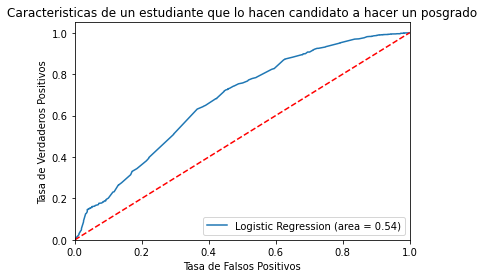

<ipython-input-118-dd4e5079c785>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Caracteristicas de un estudiante que lo hacen candidato a hacer un posgrado')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
## Reescribir el DataFrame para generar el DashBoard
y_test['Clasificacion'] = y_pred
DatosDashBoardFinal = pd.merge(DatosDashBoard,y_test['Clasificacion'],how = 'left',left_index = True, right_index = True)

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [119]:
##Reemplazar el nombre de las columnas
DatosModelo.rename(columns={'ESTRATO_CAT':'Estrato', 'ESTU_GENERO_CAT':'Genero','ESTU_TIENEETNIA_CAT':'Pertenece a una Etnia','FAMI_TIENEINTERNET_CAT':'Tiene Internet',
                            'COLE_NATURALEZA_CAT':'Naturaleza de Colegio', 'FAMI_SITUACIONECONOMICA_CAT': 'Situación Económica','FAMI_PERSONASHOGAR_CAT': 'Personas en el hogar',
                            'FAMI_TIENECOMPUTADOR_CAT':'Tiene Computador', 'FAMI_COMELECHEDERIVADOS_CAT': 'Habitos Alimenticios','COLE_AREA_UBICACION_CAT':'Ubicacion Colegio'},
               inplace=True)

In [120]:
def valores_filtro_columna(DatosModelo):
    columna = DatosModelo.astype(str)       
    valores = DatosModelo.unique().tolist() 
    valores = sorted(valores)           
    valores.insert(0, "Todos")         
    return valores 
##Se configura el primer filtro
Etnia = widgets.Dropdown(options = valores_filtro_columna(DatosModelo["Pertenece a una Etnia"]))
Internet = widgets.Dropdown(options = valores_filtro_columna(DatosModelo["Tiene Internet"]))
Estrato = widgets.Dropdown(options = valores_filtro_columna(DatosModelo["Estrato"]))
seleccion = widgets.Output()

def accion_cambio_menu(change):
    # Reestablecemos la variable seleccion.
    seleccion.clear_output() 
    # Cuando seleccion toma un nuevo valor.
    with seleccion:
        # Si el nuevo valor es "Todos".
        if (change["new"] == "Todos"):
            # Muestre todos los registros.
            display(DatosModelo)
        # Si el nuevo valor es diferente de "Todos".
        else:
            # Muestre los registros correspondientes al nuevo valor. 
            display(DatosModelo[(DatosModelo["Pertenece a una Etnia"] == Etnia) & (DatosModelo["PERIODO"] == Periodo)])

Etnia.observe(accion_cambio_menu, names='value')
Internet.observe(accion_cambio_menu, names='value')
Estrato.observe(accion_cambio_menu, names='value')

def filtrar(Etnia, Internet, Estrato):
    if  Etnia != "Todos" and Internet != "Todos" and Estrato != "Todos":
        display(DatosModelo[(DatosModelo["Pertenece a una Etnia"] == Etnia) & (DatosModelo["Tiene Internet"] == Internet)
                   & (DatosModelo["Estrato"] == Estrato)])
    elif Etnia == "Todos" and Internet != "Todos" and Estrato != "Todos":
        display(DatosModelo[(DatosModelo["Tiene Internet"] == Internet) & (DatosModelo["Estrato"] == Estrato)])  
    elif Etnia == "Todos" and Internet == "Todos" and Estrato != "Todos":
        display(DatosModelo[(DatosModelo["Estrato"] == Estrato)])
    elif Etnia == "Todos" and Internet != "Todos" and Estrato == "Todos":
        display(DatosModelo[(DatosModelo["Tiene Internet"] == Internet)])
    elif Etnia != "Todos" and Internet == "Todos" and Estrato == "Todos":
        display(DatosModelo[(DatosModelo["Pertenece a una Etnia"] == Etnia)])
    elif Etnia != "Todos" and Internet != "Todos" and Estrato == "Todos":
        display(DatosModelo[(DatosModelo["Pertenece a una Etnia"] == Etnia) & (DatosModelo["Tiene Internet"] == Internet)]) 
    elif Etnia != "Todos" and Internet == "Todos" and Estrato != "Todos":
        display(DatosModelo[(DatosModelo["Pertenece a una Etnia"] == Etnia) & (DatosModelo["Estrato"] == Estrato)])
    elif  Etnia == "Todos" and Internet == "Todos" and Estrato == "Todos":
        display(DatosModelo)   
print("La siguiente tabla le permite al usuario flitrar los registros de la tabla de acuerdo con las variables con un mayor impacto sobre el modelo de regresión para validar la información puntual de los estudiantes que cumplen las condiones del modelo")
interactive_plot = interactive(
                                filtrar, 
                                Etnia = valores_filtro_columna(DatosModelo["Pertenece a una Etnia"]),
                                Internet = valores_filtro_columna(DatosModelo["Tiene Internet"]),
                                Estrato = valores_filtro_columna(DatosModelo["Estrato"])
                                
                              )
    
display(interactive_plot)

La siguiente tabla le permite al usuario flitrar los registros de la tabla de acuerdo con las variables con un mayor impacto sobre el modelo de regresión para validar la información puntual de los estudiantes que cumplen las condiones del modelo


interactive(children=(Dropdown(description='Etnia', options=('Todos', 0, 1), value='Todos'), Dropdown(descript…

In [229]:
#se define el titulo del tablero y los botones de selecci
titulo = '# Tablero de control Desempeño Pruebas Saber 11'
tooltip = 'Este tablero busca que el usuario pueda visulizar la capacidad de predicción de los modelos con las variables explica'
seleccion = pn.widgets.RadioButtonGroup(options=['Desempeño' , 'Clasificación'],button_type='primary')
#Estrato = pn.widgets.IntSlider(value=6,min=0,max=6,step=1,description='Estrato:',continuous_update=True)
lista = DatosDashBoard['ESTRATO_CAT'].unique().tolist()
lista1 = sorted(lista)
Estrato = pn.widgets.Select(name='Estrato Socioeconómico', options= lista1)
#seleccion1 = pn.widgets.RadioButtonGroup(options=['Tiene Internet','Estrato','Habitos Alimenticios'],button_type='success')


In [230]:
@pn.depends(seleccion.param.value, Estrato.param.value)

def grafico_sel(seleccion,Estrato):
    df = DatosDashBoard
    df1 = DatosDashBoardFinal
    if seleccion == 'Desempeño':
        filtro = (df['ESTRATO_CAT'] == Estrato)
        filtered_df = df.loc[filtro]
        x = filtered_df['PUNT_GLOBAL']
        x1 = filtered_df['Prediccion']
        fig = go.Figure()
        fig.add_trace(go.Histogram(x=x,
        name ='Desempeño Real',
        marker_color='darkblue',
        opacity=0.75
        ))
        fig.add_trace(go.Histogram(x= x1,
        name='Desempeño Estimado',
        marker_color='lightskyblue',
        opacity=0.75
        ))
        fig.update_layout(barmode='overlay',
                        yaxis_title="Frecuencia",
                        xaxis_title= 'Puntaje Estudiante en el estrato '+ str(Estrato),
                        title= 'Reporte '+ str(seleccion)+ " Obtenido y "+
                        "Esperado de un estudiante de estrato "+str(Estrato),                               
                        plot_bgcolor='white',                                      
                        showlegend=True,                                         
                        width=1100
                     )
    elif seleccion == 'Clasificación':
        filtro = df1['ESTRATO_CAT'] == Estrato
        filtered_df1 = df1.loc[filtro]
        #valores =   'Posgrado Medido', 'No Posgrado Medido','Posgrado Clasificado','No Posgrado Clasificado')
        #valores = filtered_df1.POSGRADO.unique()
        #item_counts = filtered_df1["POSGRADO"].value_counts()
        valores = filtered_df1.Clasificacion.unique()
        item_counts = filtered_df1["Clasificacion"].value_counts()
        donut_colors=['darkblue','lightskyblue']
        #donut_colors1 =['powderred','lightred']
        fig = go.Figure(
                data = [
                        go.Pie(
                                labels= valores, values=item_counts,  hole=0, marker_colors=donut_colors, sort=False
                                )
                        ]
                )
                                
        fig.update_traces(
                        textposition='inside',
                        textinfo='label+value+percent',
                        showlegend=True,
                )
        fig.update_layout(
                        title = ("Estudiantes que aplicarían a pogramas de "+
                                "pregrado según el modelo por su desempeño "+ 
                                 "en la prueba Saber 11"),
                        width=1100
        )
     
        fig.show()
        
    return fig

In [231]:
dashboard = pn.Column(pn.Row(titulo,seleccion,Estrato), grafico_sel)
dashboard.servable()
dashboard.show()
pn.serve(dashboard)

Launching server at http://localhost:63737
Launching server at http://localhost:63738
